# Fake News Detector Using Machine Learning and Neural Networks

## This is going to be my first solo project that I will be exploring. I do not know the scope of what I will be doing, however, I just want to explore and learn. I will update this as a work out what the scope of this project will be. Goal is to learn and get more comfortable with machine learning and neural networks. Maybe aim to use pytorch or scikit learn.

### I will be working with Kaggle's Fake News Dataset: https://www.kaggle.com/c/fake-news/data#

Import necessary libraries and dataset

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Read in the data
df = pd.read_csv('data/train.csv')
X = df[['id', 'title', 'author', 'text']]
y = df['label']
df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## Explore the Dataset here

In [69]:
# Check for missing values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

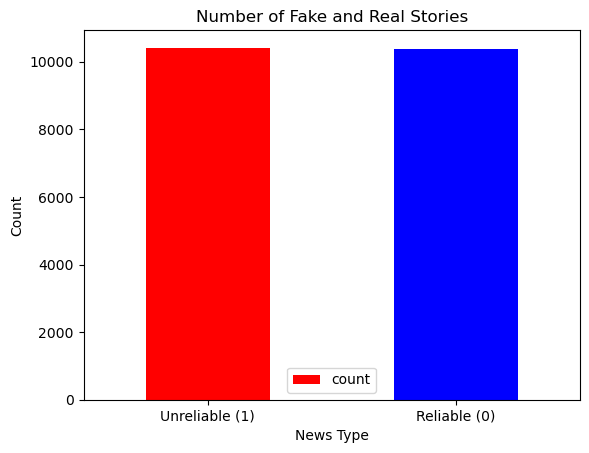

In [70]:
# Help me visualize how many fake and real stories there are with label 1 being unreliable and 0 being reliable
# Make unreliable bar red and reliable bar blue
plot = df['label'].value_counts().plot(kind='bar', title='Number of Fake and Real Stories', legend=True, color=['red', 'blue'])
plot.set_xticklabels(['Unreliable (1)', 'Reliable (0)'], rotation=0)
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()


## Data Preprocessing


Clean the text and remove elements that are not useful for analysis

In [71]:
# Remove html tags if any
df['text'] = df['text'].str.replace('<[^<]+?>', '')

In [72]:
# Eliminate special characters and punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')

In [73]:
import nltk
from nltk.corpus import stopwords

# Download stopwords list
nltk.download('stopwords')

# Load stopwords into a set for faster lookup
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        # Split the text into words and filter out the stopwords
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return " ".join(filtered_words)
    return text

# Apply the function to the entire 'text' column using a vectorized operation
df['text'] = df['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emmetthintz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Feature Engineering

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Concatenating text columns; handle missing values by replacing them with empty strings
df['title'].fillna('', inplace=True)
df['author'].fillna('', inplace=True)
df['text'].fillna('', inplace=True)
df['combined_text'] = df['title'] + ' ' + df['author'] + ' ' + df['text']

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the combined text
X_tfidf = tfidf_vectorizer.fit_transform(df['combined_text'])

# Assuming 'label' is your target variable
y = df['label']

## Model Training

In [75]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

### Here I will be using Naive Bayes and Logistic Regression Models for Analysis

In [76]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Initialize the model
model_nb = MultinomialNB()
model_lr = LogisticRegression(max_iter=1000)

### Train the Models

In [77]:
# Train the Naive Bayes Model
model_nb.fit(X_train, y_train)

MultinomialNB()

In [78]:
# Train the Logistic Regression Model'
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation

In [79]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# function to evaluate the model
def evaluate_model(model, X_test, y_test):
    # Create predictions with the model
    y_pred = model.predict(X_test)
    
    # Print evaluation metrics
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("\n")

### Evaluate the Naive Bayes Model

In [80]:
print("Naive Bayes Classifier Evaluation: ")
evaluate_model(model_nb, X_test, y_test)

Naive Bayes Classifier Evaluation: 
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2132
           1       0.99      0.77      0.86      2028

    accuracy                           0.88      4160
   macro avg       0.90      0.88      0.88      4160
weighted avg       0.90      0.88      0.88      4160

Confusion Matrix:
 [[2114   18]
 [ 472 1556]]
Accuracy:  0.8822115384615384




### Evaluate the Logistic Regression Model

In [83]:
print("Logistic Regression Classifier Evaluation")
evaluate_model(model_lr, X_test, y_test)

Logistic Regression Classifier Evaluation
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2132
           1       0.96      0.97      0.96      2028

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160

Confusion Matrix:
 [[2050   82]
 [  68 1960]]
Accuracy:  0.9639423076923077




## Model Visualization

### Visualize the Confusion Matricies

Text(120.72222222222221, 0.5, 'True Labels')

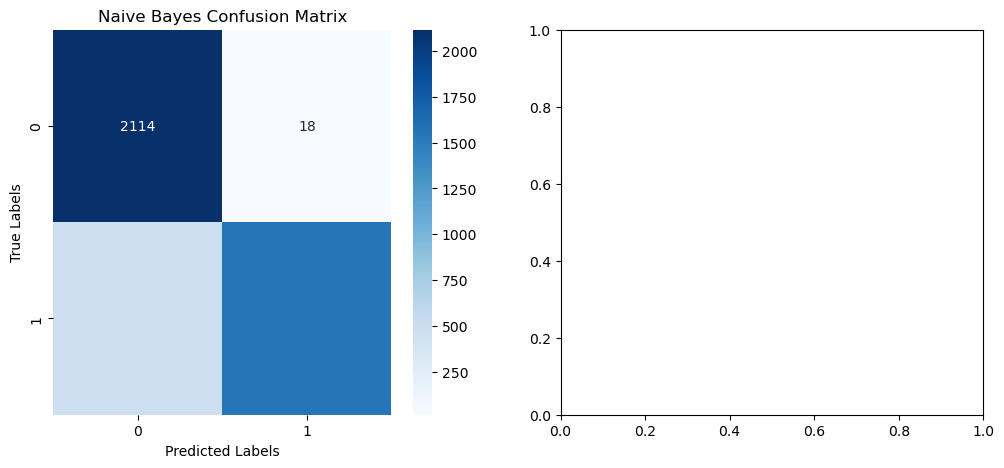

In [87]:
y_pred_nb = model_nb.predict(X_test)
y_pred_lr = model_lr.predict(X_test)

# Confusion matricies from the models
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Create the plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Naive Bayes Confusion Matrix
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Naive Bayes Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# Logistic Regression Confusion Matrix
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[0].set_title('Naive Bayes Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')